In [35]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, normalize
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report
pd.options.mode.chained_assignment = None

Populating the interactive namespace from numpy and matplotlib


In [3]:
#importing the dataset
filename = 'exercise2_data.csv'
df = pd.read_csv(filename) #read in data
df

,account_no,gender,age,income,loan_amount,term,installment_amount,interest_rate,credit_score_at_application,outstanding_balance,status
0,acc_00000316,F,18,12143,47000,60,1045,0.12,860,0,PAID_UP
1,acc_00000422,F,18,6021,13000,60,330,0.18,640,0,PAID_UP
2,acc_00001373,F,39,12832,13000,60,296,0.13,820,0,PAID_UP
3,acc_00001686,F,33,4867,5000,36,191,0.22,540,0,PAID_UP
4,acc_00001733,F,23,5107,22000,36,818,0.20,580,11314,LIVE
...,...,...,...,...,...,...,...,...,...,...,...
11993,acc_09994190,M,44,10801,27000,48,779,0.17,670,0,PAID_UP
11994,acc_09997161,M,43,20145,51000,60,1109,0.11,880,0,PAID_UP
11995,acc_09997530,M,40,13647,23000,24,1115,0.15,760,0,PAID_UP
11996,acc_09998535,M,38,12322,8000,36,277,0.15,730,0,PAID_UP


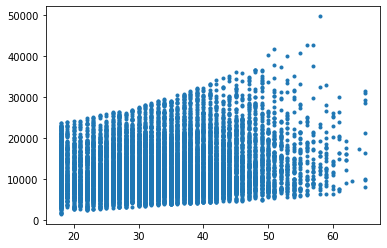

In [4]:
#plot 1 Age vs Income
plt.plot(df['age'], df['income'], '.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001759CDD9408>]],
      dtype=object)

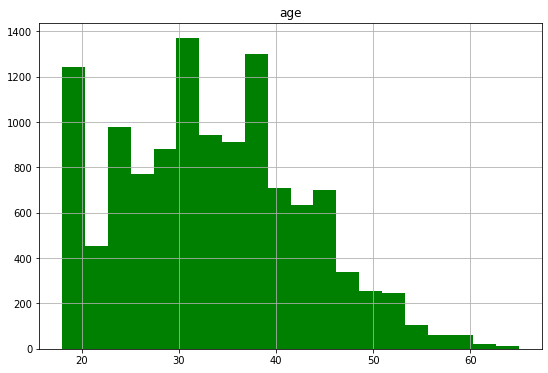

In [5]:
#plot 2 Age Histogram
df.hist(column='age', figsize=(9,6), bins=20, color='green')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001759D0C1688>]],
      dtype=object)

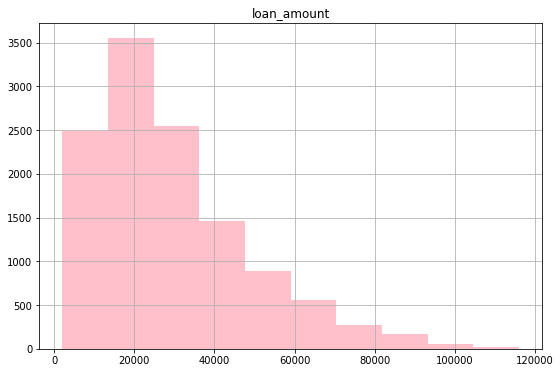

In [6]:
#plot 3 Loan Amount Histogram
df.hist(column='loan_amount', figsize=(9,6), bins=10, color='pink')

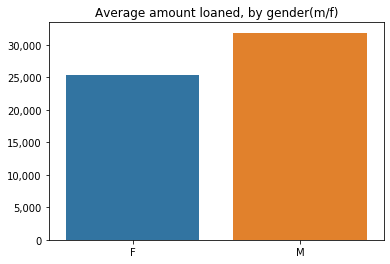

In [7]:
#plot 4 Average amount loaned by gender
group = df.groupby('gender').agg([np.mean])
loan_amt_mean = group['loan_amount'].reset_index()
ax = sns.barplot(y = "mean", x = 'gender', data=loan_amt_mean)
ax.set(xlabel = '', ylabel = '', title = 'Average amount loaned, by gender(m/f)')
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

In [8]:
#correlation matrix
df.corr()

,age,income,loan_amount,term,installment_amount,interest_rate,credit_score_at_application,outstanding_balance
age,1.000000,0.193818,-0.072230,-0.003982,-0.057900,0.012086,-0.010451,-0.023832
income,0.193818,1.000000,0.680920,0.064690,0.449111,-0.901268,0.910796,0.115041
loan_amount,-0.072230,0.680920,1.000000,0.083624,0.713816,-0.663469,0.671630,0.189535
term,-0.003982,0.064690,0.083624,1.000000,-0.447887,-0.061598,0.064137,0.019644
installment_amount,-0.057900,0.449111,0.713816,-0.447887,1.000000,-0.435688,0.443470,0.140306
interest_rate,0.012086,-0.901268,-0.663469,-0.061598,-0.435688,1.000000,-0.976295,-0.094837
credit_score_at_application,-0.010451,0.910796,0.671630,0.064137,0.443470,-0.976295,1.000000,0.101903
outstanding_balance,-0.023832,0.115041,0.189535,0.019644,0.140306,-0.094837,0.101903,1.000000


In [9]:
#Historical data where status = PAID_UP or DEFAULT
df_historical = df[df['status'].isin(['PAID_UP','DEFAULT'])]
df_historical

,account_no,gender,age,income,loan_amount,term,installment_amount,interest_rate,credit_score_at_application,outstanding_balance,status
0,acc_00000316,F,18,12143,47000,60,1045,0.12,860,0,PAID_UP
1,acc_00000422,F,18,6021,13000,60,330,0.18,640,0,PAID_UP
2,acc_00001373,F,39,12832,13000,60,296,0.13,820,0,PAID_UP
3,acc_00001686,F,33,4867,5000,36,191,0.22,540,0,PAID_UP
5,acc_00002114,M,38,9328,25000,36,904,0.18,630,0,PAID_UP
...,...,...,...,...,...,...,...,...,...,...,...
11993,acc_09994190,M,44,10801,27000,48,779,0.17,670,0,PAID_UP
11994,acc_09997161,M,43,20145,51000,60,1109,0.11,880,0,PAID_UP
11995,acc_09997530,M,40,13647,23000,24,1115,0.15,760,0,PAID_UP
11996,acc_09998535,M,38,12322,8000,36,277,0.15,730,0,PAID_UP


In [10]:
#Current data where status = LIVE
df_current = df[df['status'] == 'LIVE']
df_current

,account_no,gender,age,income,loan_amount,term,installment_amount,interest_rate,credit_score_at_application,outstanding_balance,status
4,acc_00001733,F,23,5107,22000,36,818,0.20,580,11314,LIVE
40,acc_00038217,F,40,15659,33000,48,853,0.11,880,5637,LIVE
41,acc_00039355,M,25,15660,15000,48,395,0.12,860,6039,LIVE
44,acc_00041999,F,30,4208,15000,48,481,0.23,530,2817,LIVE
46,acc_00043452,F,18,6535,12000,48,346,0.17,660,3120,LIVE
...,...,...,...,...,...,...,...,...,...,...,...
11974,acc_09985789,F,48,7817,21000,48,628,0.19,620,9878,LIVE
11980,acc_09989286,M,18,5138,25000,60,705,0.23,530,6913,LIVE
11986,acc_09991644,M,39,12454,43000,48,1197,0.15,730,11627,LIVE
11990,acc_09993006,F,38,6276,13000,36,483,0.20,590,2795,LIVE


In [11]:
#encoding categorical variables (gender and status)
status_encoder = LabelEncoder()
status_encoder.fit(df_historical['status'])
df_historical['status'] = status_encoder.transform(df_historical['status'])
#paid_up = 1, default = 0

status_encoder.fit(df_historical['gender'])
df_historical['gender'] = status_encoder.transform(df_historical['gender'])
df_current['gender'] = status_encoder.transform(df_current['gender'])
# f=0, m=1

In [12]:
#re-checking variable types
df_current.dtypes

account_no                      object
gender                           int32
age                              int64
income                           int64
loan_amount                      int64
term                             int64
installment_amount               int64
interest_rate                  float64
credit_score_at_application      int64
outstanding_balance              int64
status                          object
dtype: object

In [13]:
df_historical['status'].value_counts()
# 689 defaulted loans versus 9308 paid up 

1    9308
0     689
Name: status, dtype: int64

In [14]:
#set the target as status and thge others (minue outstanding_balance) as inputs
target = df_historical['status']
inputs = df_historical.loc[:, 'gender':'credit_score_at_application']

In [15]:
df_historical = df_historical.sample(frac=1) #shuffling rows in the dataset
X = inputs.values
Y = target.values

In [16]:
#splitting into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [48]:
#using a Gaussian Naive Bayes classifier as the classification algorithm
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_pred = gnb.predict(X_test)

#model evaluation using the f1 score
f1_val = f1_score(Y_test, y_pred)
print(f1_val)

0.9375619425173439


In [50]:
#Classification report
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.37      0.94      0.53       262
           1       1.00      0.89      0.94      3737

    accuracy                           0.89      3999
   macro avg       0.68      0.91      0.73      3999
weighted avg       0.95      0.89      0.91      3999

[[ 247   15]
 [ 426 3311]]


In [51]:
#forecast value of book
current_inputs = df_current.loc[:, 'gender':'credit_score_at_application']
X2 = current_inputs.values

In [68]:
current_pred = gnb.predict_proba(X2)
current_pred_val = gnb.predict(X2)

In [73]:
#Repayment amounts for defaulted loans
d = df_current.values
for i in range(len(X2)):
   #if (current_pred_val[i] == 0):
     print("X=%s, Predicted=%s, Repayment amount=%s" % (d[i], current_pred_val[i], (1- current_pred[i,0])*d[i,9]))

X=['acc_00001733' 0 23 5107 22000 36 818 0.2 580 11314 'LIVE'], Predicted=0, Repayment amount=1253.1773209223481
X=['acc_00038217' 0 40 15659 33000 48 853 0.11 880 5637 'LIVE'], Predicted=1, Repayment amount=5637.0
X=['acc_00039355' 1 25 15660 15000 48 395 0.12 860 6039 'LIVE'], Predicted=1, Repayment amount=6039.0
X=['acc_00041999' 0 30 4208 15000 48 481 0.23 530 2817 'LIVE'], Predicted=0, Repayment amount=15.68872769451977
X=['acc_00043452' 0 18 6535 12000 48 346 0.17 660 3120 'LIVE'], Predicted=1, Repayment amount=3117.2639992590152
X=['acc_00046346' 0 43 20508 47000 24 2126 0.08 960 12607 'LIVE'], Predicted=1, Repayment amount=12607.0
X=['acc_00065653' 0 53 11193 7000 36 246 0.16 730 1087 'LIVE'], Predicted=1, Repayment amount=1087.0
X=['acc_00066883' 1 23 11632 23000 36 797 0.15 760 6849 'LIVE'], Predicted=1, Repayment amount=6849.0
X=['acc_00069620' 1 39 23332 32000 48 796 0.09 930 11992 'LIVE'], Predicted=1, Repayment amount=11992.0
X=['acc_00084510' 0 40 11999 8000 60 186 0.14 

X=['acc_09142506' 1 49 10318 13000 24 649 0.18 640 2058 'LIVE'], Predicted=1, Repayment amount=2057.9979588240244
X=['acc_09143376' 1 23 24861 65000 48 1439 0.03 1000 55892 'LIVE'], Predicted=1, Repayment amount=55892.0
X=['acc_09153296' 1 27 14454 46000 48 1234 0.13 820 12973 'LIVE'], Predicted=1, Repayment amount=12973.0
X=['acc_09153871' 1 38 23112 48000 60 996 0.09 930 12905 'LIVE'], Predicted=1, Repayment amount=12905.0
X=['acc_09156770' 0 41 8817 25000 12 2280 0.17 680 6949 'LIVE'], Predicted=1, Repayment amount=6948.999999999971
X=['acc_09175292' 0 36 13306 17000 24 808 0.13 840 8055 'LIVE'], Predicted=1, Repayment amount=8055.0
X=['acc_09176310' 1 40 13695 48000 72 1015 0.15 760 14794 'LIVE'], Predicted=1, Repayment amount=14794.0
X=['acc_09177805' 0 37 13110 27000 60 614 0.13 830 21085 'LIVE'], Predicted=1, Repayment amount=21085.0
X=['acc_09183979' 1 29 22094 21000 60 436 0.09 950 13265 'LIVE'], Predicted=1, Repayment amount=13265.0
X=['acc_09186989' 1 33 15594 42000 48 1127 

In [83]:
#Sum
total_sum=0
for i in range(len(X2)):
    total_sum = total_sum + (1- current_pred[i,0])*d[i,9]
print(total_sum)

22701880.990860887
